In [1]:
from entities import *
from constants import *
from simulations import *

import pickle
import numpy as np
import pandas as pd

c:\Users\amgal\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open(TEAMS_DATA, 'rb') as f:
    teams = pickle.load(f)

with open(STAT_EFFECTS, 'rb') as f:
    stats = pickle.load(f)

In [3]:
test = simulate_n_games(teams['Arizona'], teams['Duke'], 500, summary=True)

Simulating Game: Arizona vs. Duke


100%|██████████| 500/500 [00:05<00:00, 95.37it/s] 


Preparing simulation analysis...
Arizona dominates due to higher volume and efficiency, plus rebounding and ball control; Duke's turnover rate and board struggles drive the gap.
Arizona vs. Duke Complete!


In [4]:
test['Record']

'Arizona: 347 - 153 :Duke'

In [5]:
test['Contributions']

,Team,2P,2PA,3P,3PA,BLK,STL,TOV,ORB,DRB,PF,Games Played
Brayden Burries,Arizona,1107,1890,455,1139,103,388,284,155,1501,491,363
Ivan Kharchenkov,Arizona,845,1188,156,594,198,321,346,123,520,445,346
Jaden Bradley,Arizona,1282,2565,170,513,0,486,486,108,783,756,378
Koa Peat,Arizona,1390,2336,91,212,212,188,306,472,944,472,331
Motiejus Krivas,Arizona,763,1292,58,117,352,211,328,563,1526,540,329
Caleb Foster,Duke,529,1059,268,776,0,70,305,188,588,541,328
Cameron Boozer,Duke,1780,2669,459,1083,26,528,687,1004,1585,396,369
Dame Sarr,Duke,163,300,159,665,107,171,300,214,408,408,301
Isaiah Evans,Duke,616,1017,744,2109,198,347,272,99,744,223,347
Maliq Brown,Duke,296,518,26,79,99,419,219,458,598,618,279


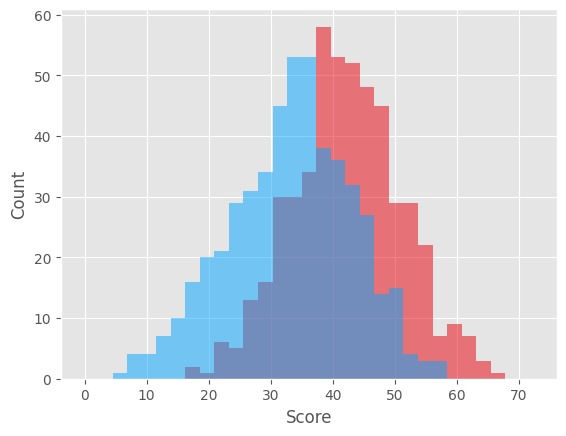

In [10]:
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('ggplot')

az = test['Scores']['Arizona']
duke = test['Scores']['Duke']

min_score = min(az + duke)
max_score = max(az + duke)
bins = np.linspace(min_score-5, max_score+5, 32)

plt.hist(az, bins=bins, color='#e8000d', alpha=0.5)
plt.hist(duke, bins=bins, color="#00A6FF", alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [8]:
test['Analysis']

"Arizona dominates due to higher volume and efficiency, plus rebounding and ball control; Duke's turnover rate and board struggles drive the gap."

In [9]:
print(
f"""
{test['Team 1'].name} has won {test['Win Count 1']} games ({round(test['Team 1 Win Pct'] * 100, 2)}%)
{test['Team 2'].name} has won {test['Win Count 2']} games ({round(test['Team 2 Win Pct'] * 100, 2)}%)

Overall winner: {test['Winner']}
""")


Arizona has won 347 games (69.0%)
Duke has won 153 games (31.0%)

Overall winner: Arizona

